In [1]:
#conda install -c anaconda pydotplus

# conda install -c anaconda graphviz 

# C:\Program Files (x86)\WinGraphviz\  Download from http://wingraphviz.sourceforge.net/wingraphviz/

#;C:\Program Files (x86)\Graphviz2.38\bin 

#System avriable
#Adavanced- Env Varable

#append line

# https://graphviz.gitlab.io/_pages/Download/Download_windows.html 

# C:\Program Files (x86)\Graphviz2.38\

# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [2]:

import sklearn.datasets as datasets
import pandas as pd

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [20]:
df.shape
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=5)
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

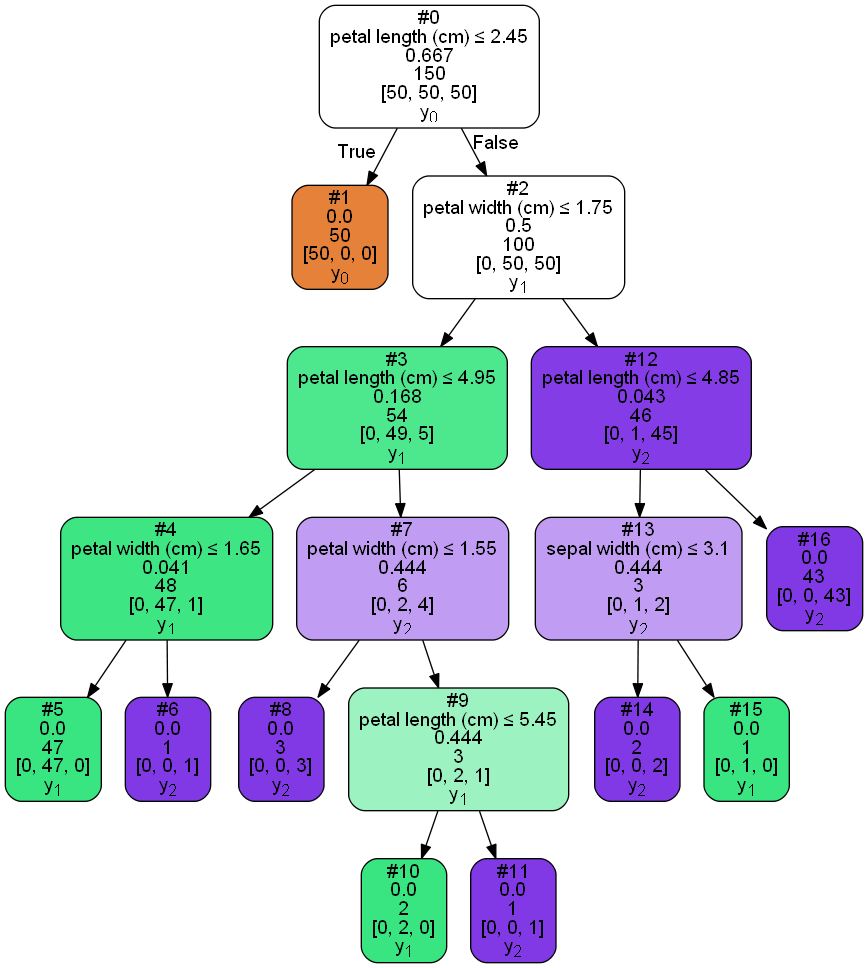

In [12]:
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  filled=True, rounded=True,  special_characters=True, class_names=True,label=True,node_ids=True,feature_names=df.columns, impurity=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [6]:
dot_data

In [13]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print ("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)
        


In [14]:
get_code(dtree, df.columns)

if ( petal length (cm) <= 2.450000047683716 ) {
return [[50.  0.  0.]]
} else {
if ( petal width (cm) <= 1.75 ) {
if ( petal length (cm) <= 4.949999809265137 ) {
if ( petal width (cm) <= 1.6500000953674316 ) {
return [[ 0. 47.  0.]]
} else {
return [[0. 0. 1.]]
}
} else {
if ( petal width (cm) <= 1.5499999523162842 ) {
return [[0. 0. 3.]]
} else {
if ( petal length (cm) <= 5.449999809265137 ) {
return [[0. 2. 0.]]
} else {
return [[0. 0. 1.]]
}
}
}
} else {
if ( petal length (cm) <= 4.850000381469727 ) {
if ( sepal width (cm) <= 3.0999999046325684 ) {
return [[0. 0. 2.]]
} else {
return [[0. 1. 0.]]
}
} else {
return [[ 0.  0. 43.]]
}
}
}


In [15]:
# ANother Example
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import tree
# creating dataset for modeling Apple / Orange classification
fruit_data_set = pd.DataFrame()
fruit_data_set["fruit"] = np.array([1, 1, 1, 1, 1,      # 1 for apple
                                    0, 0, 0, 0, 0])     # 0 for orange
fruit_data_set["weight"] = np.array([170, 175, 180, 178, 182,
                                     130, 120, 130, 138, 145])
fruit_data_set["smooth"] = np.array([9, 10, 8, 8, 7,
                                     3, 4, 2, 5, 6])

fruit_classifier = tree.DecisionTreeClassifier()
fruit_classifier.fit(fruit_data_set[["weight", "smooth"]], fruit_data_set["fruit"])

print(">>>>> Trained fruit_classifier <<<<<")
print(fruit_classifier)

>>>>> Trained fruit_classifier <<<<<
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [16]:
fruit_data_set

,fruit,weight,smooth
0,1,170,9
1,1,175,10
2,1,180,8
3,1,178,8
4,1,182,7
5,0,130,3
6,0,120,4
7,0,130,2
8,0,138,5
9,0,145,6


In [17]:
# fruit data set 1st observation
test_features_1 = [[fruit_data_set["weight"][0], fruit_data_set["smooth"][0]]]

test_features_1_fruit = fruit_classifier.predict(test_features_1)

print ("Actual fruit type: {act_fruit} , Fruit classifier predicted: {predicted_fruit}".format(
    act_fruit=fruit_data_set["fruit"][0], predicted_fruit=test_features_1_fruit))

Actual fruit type: 1 , Fruit classifier predicted: [1]


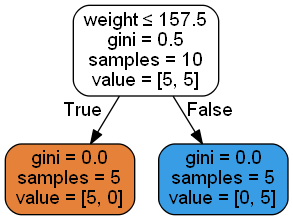

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
with open("fruit_classifier.txt", "w") as f:
    f = tree.export_graphviz(fruit_classifier, out_file=f)

dot_data = StringIO()
export_graphviz(fruit_classifier, out_file=dot_data,   filled=True, rounded=True, special_characters=True,feature_names=fruit_data_set.columns[1:], impurity=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [63]:
# Read data from 
import pandas as pd
binary= pd.read_csv('http://dni-institute.in/blogs/wp-content/uploads/2017/07/dt_data.csv')
binary.head()

,Card_Cust_ID,Gender,Education_level,Unnamed: 3,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,NaN,160,200,1
1,1000002,F,University,NaN,250,190,0
2,1000003,F,University,NaN,470,530,0
3,1000004,F,University,NaN,830,800,0
4,1000005,M,University,NaN,750,480,0


In [64]:
# Columns
#binary.dtypes.index
# Drop a column
binary.drop('Unnamed: 3', axis=1, inplace=True)
# Target Variable to be made {-1, 1}
binary.Spend_Drop_over50pct.replace([0, 1], ['A', 'B'], inplace=True)

# Print a few rows
binary.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
0,1000001,F,University,160,200,B
1,1000002,F,University,250,190,A
2,1000003,F,University,470,530,A
3,1000004,F,University,830,800,A
4,1000005,M,University,750,480,A


In [56]:
# Pruning Filter


#binary = binary[binary.Last_Month_spend > 900]
#binary.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
6,1000007,M,Graduate,1190,1190,A
12,1000014,M,University,910,900,A
16,1000018,M,Graduate,1140,1160,B
28,1000031,M,Graduate,970,980,A
32,1000035,M,University,1130,1120,A


In [65]:
# Count Target Variable Values
binary.Spend_Drop_over50pct.value_counts()
# Find % Values of Target Variable Levels
round(binary.Spend_Drop_over50pct.value_counts()*100/len(binary.axes[0]),2)

A    73.68
B    26.32
Name: Spend_Drop_over50pct, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

Train,Test = train_test_split(binary, test_size = 0.3, random_state = 176)
# Print a few rows
Train.head()

,Card_Cust_ID,Gender,Education_level,Last_Month_spend,Last_3m_avg_spend,Spend_Drop_over50pct
34,1000037,M,Graduate,20,30,B
335,1000361,M,University,790,780,A
439,1011077,M,High School,1190,1190,A
4,1000005,M,University,750,480,A
169,1000183,M,University,460,400,B


In [67]:
# Keep Target and Independent Variable into different array
Train_IndepentVars = Train.values[:, 3:5]
Train_TargetVar = Train.values[:,5]

In [68]:
# Load library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=8, min_samples_leaf=5)
# Train
dt_train_gini.fit(Train_IndepentVars, Train_TargetVar)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

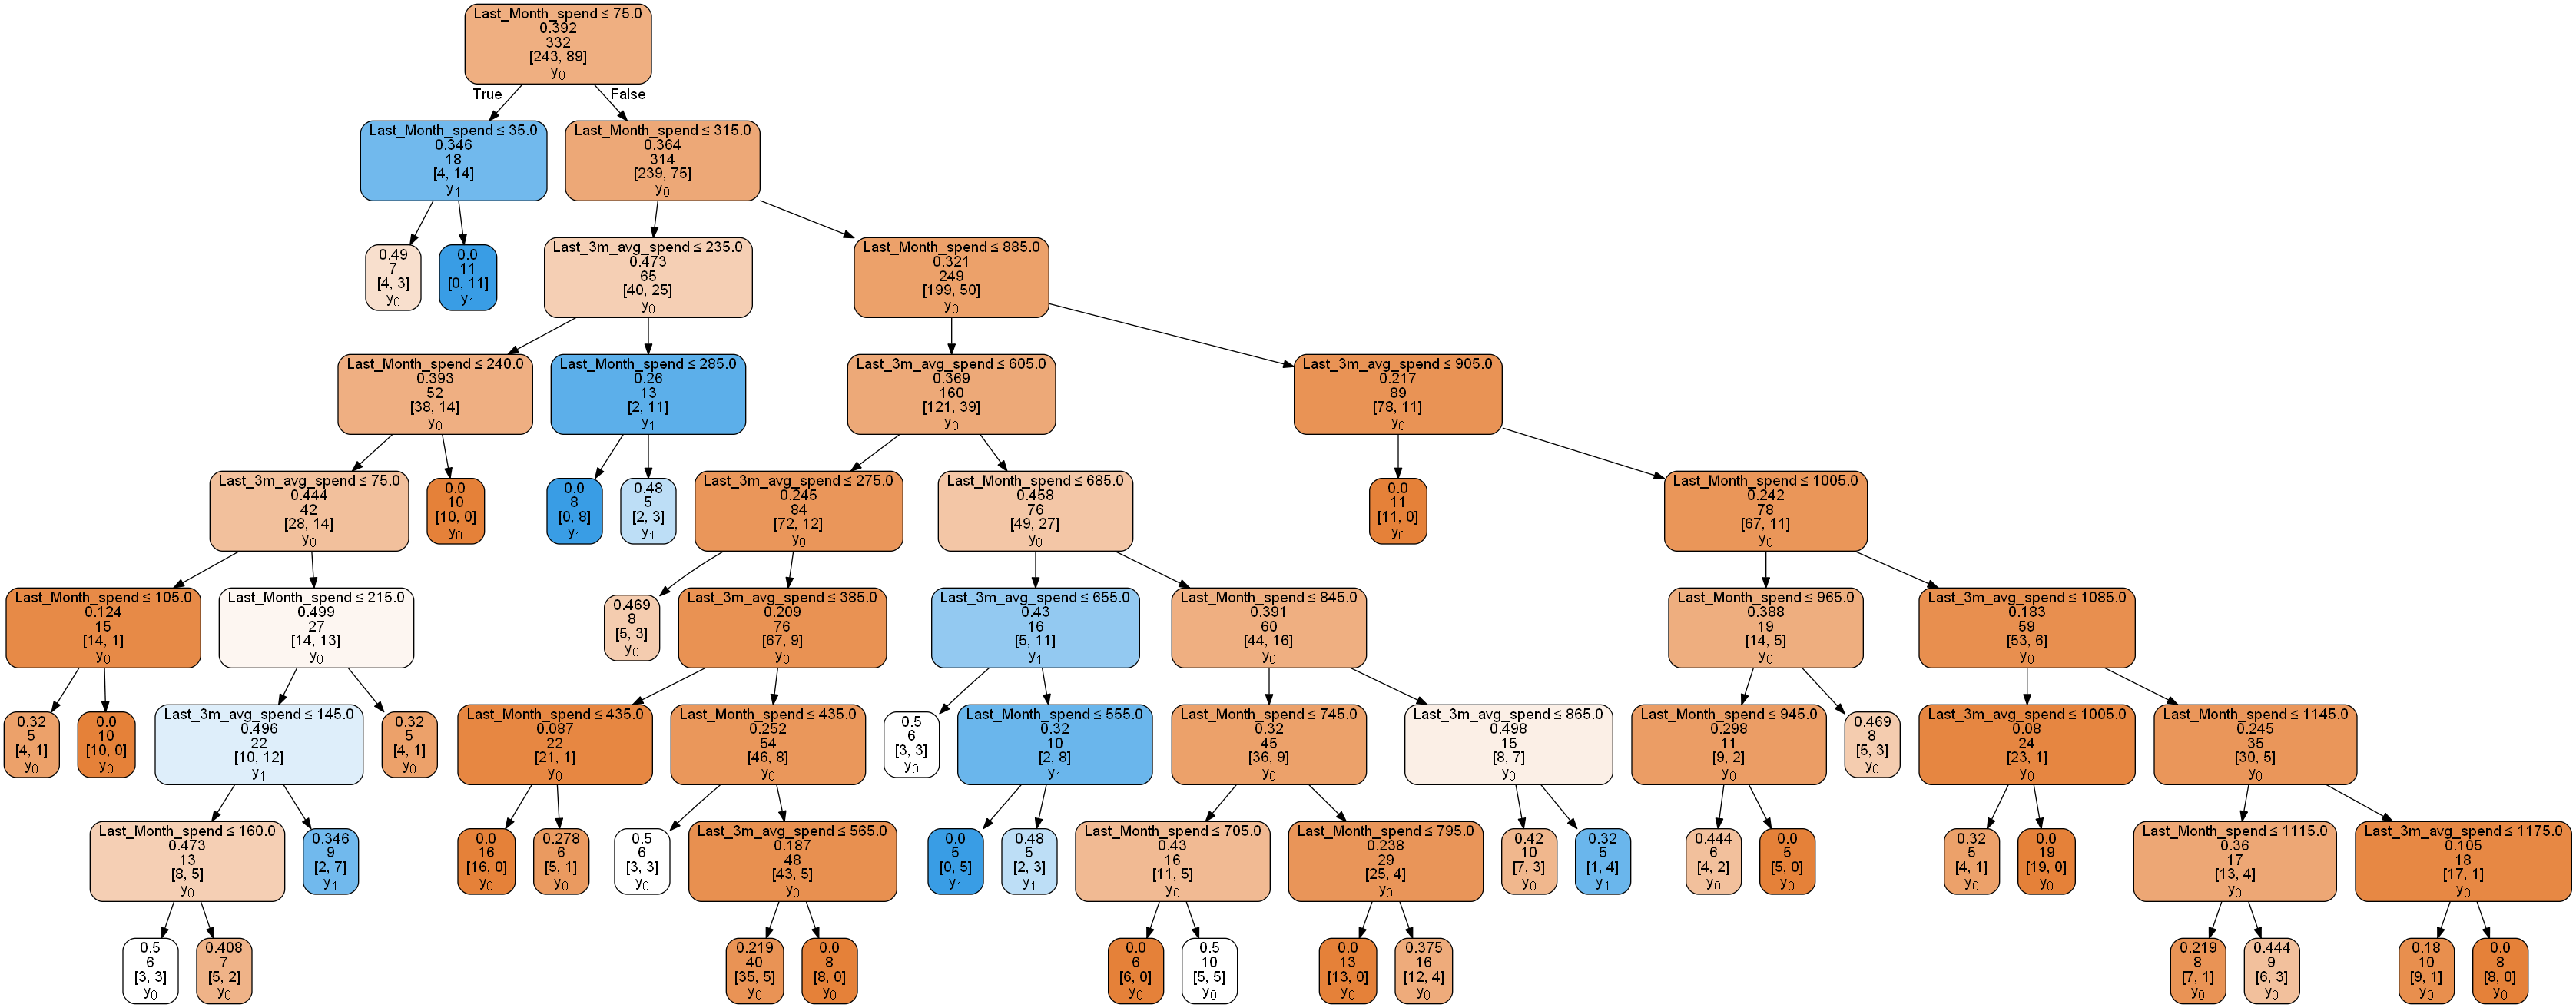

In [69]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)


df = Train.loc[:,['Last_Month_spend','Last_3m_avg_spend']]
df.axes

dot_data = StringIO()
export_graphviz(dt_train_gini , out_file=dot_data,   filled=True, rounded=True, special_characters=True, impurity=True,label=True,class_names=True,feature_names=df.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())